# Task 1 - Play Dataset

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd /content/gdrive/My Drive/CSE4020_ML

/content/gdrive/My Drive/CSE4020_ML


In [62]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv("play.csv")
data.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [16]:
X = data.drop(['day', 'play'], axis=1) # rows - (axis=0) ; columns - (axis=1)
y = data['play']

In [17]:
# calculate the entropy of the target variable "play"
num_yes = len(data[data['play'] == 'Yes'])
num_no = len(data[data['play'] == 'No'])
total = num_yes + num_no
p_yes = num_yes / total
p_no = num_no / total
entropy_d = -p_yes*math.log2(p_yes) - p_no*math.log2(p_no)


In [41]:
# calculate the conditional entropy of each attribute
for col in data.columns[1:-1]:
    entropy_a = 0
    max=0
    for val in data[col].unique():
        total_val = len(data[data[col] == val])
        num_val_yes = len(data[(data[col] == val) & (data['play'] == 'Yes')])
        num_val_no = total_val - num_val_yes
        if total_val != 0:
            p_val_yes = num_val_yes / total_val
            p_val_no = num_val_no / total_val
            entropy_a += total_val/total*(-p_val_yes*math.log2(p_val_yes+1e-9) - p_val_no*math.log2(p_val_no+1e-9))
    # calculate the information gain of the attribute
    ig = entropy_d - entropy_a
    if (max < ig):
      max = ig
      root = col
    print(col, ':', ig)

outlook : 0.24674982224763065
temp : 0.029222568544345018
humidity : 0.15183550424773173
wind : 0.04812703329365964


In [42]:
print("Root Node is: ", root)

Root Node is:  wind


In [63]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

In [24]:
df_encoded = pd.get_dummies(data, columns=['outlook', 'temp', 'humidity', 'wind'])
df_encoded

,day,play,outlook_Overcast,outlook_Rain,outlook_Sunny,temp_Cool,temp_Hot,temp_Mild,humidity_High,humidity_Normal,wind_Strong,wind_Weak
0,D1,No,0,0,1,0,1,0,1,0,0,1
1,D2,No,0,0,1,0,1,0,1,0,1,0
2,D3,Yes,1,0,0,0,1,0,1,0,0,1
3,D4,Yes,0,1,0,0,0,1,1,0,0,1
4,D5,Yes,0,1,0,1,0,0,0,1,0,1
5,D6,No,0,1,0,1,0,0,0,1,1,0
6,D7,Yes,1,0,0,1,0,0,0,1,1,0
7,D8,No,0,0,1,0,0,1,1,0,0,1
8,D9,Yes,0,0,1,1,0,0,0,1,0,1
9,D10,Yes,0,1,0,0,0,1,0,1,0,1




```
pd.get_dummies(data, columns=['outlook', 'temp', 'humidity', 'wind'])
```


*the get_dummies function identifies these columns as categorical and performs one-hot encoding on them. The resulting DataFrame, df_encoded, will have the original columns along with additional binary columns representing the different values of each categorical variable.*

*the get_dummies function would create three new columns: 'outlook_Sunny', 'outlook_Overcast', and 'outlook_Rain'. The values in these new columns would be 1 or 0, indicating the presence or absence of the corresponding value in the original 'outlook' column.*

In [25]:
X = df_encoded.drop(['day', 'play'], axis=1) # rows - (axis=0) ; columns - (axis=1)
y = df_encoded['play']

In [44]:
# Create an instance of DecisionTreeClassifier
classifier = DecisionTreeClassifier()

# Train the decision tree classifier
classifier.fit(X, y)

# Classify the test sample  <Rain, Cool, High,Weak>.
sample = pd.DataFrame({'outlook_Rain': [1], 'outlook_Sunny': [0], 'outlook_Overcast': [0],
                       'temp_Cool': [1], 'temp_Hot': [0], 'temp_Mild': [0],
                       'humidity_High': [1], 'humidity_Normal': [0],
                       'wind_Weak': [1], 'wind_Strong': [0]})

# Reorder the columns to match the data
sample = sample[X.columns]

# Make predictions on the sample
sample_pred = classifier.predict(sample)

print("Predicted value for the sample:", sample_pred[0])

Predicted value for the sample: Yes




```
sample = sample[X.columns]

```
*By using X.columns, which represents the column names of the original training data, the line sample = sample[X.columns] rearranges the columns of the sample DataFrame to match the same order as the columns in X.*


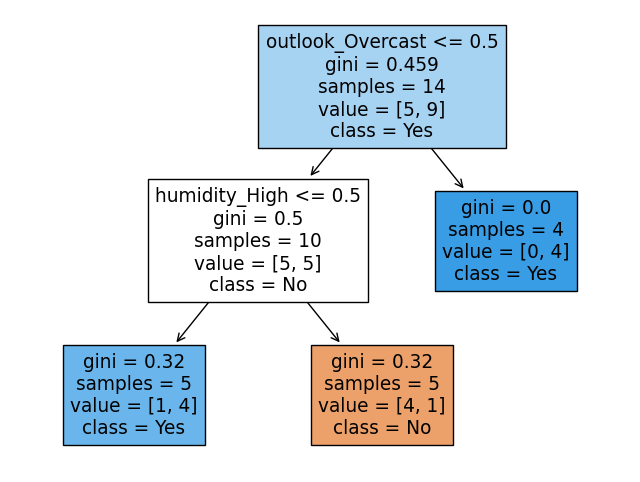

In [49]:
from sklearn.tree import plot_tree

# Create an instance of DecisionTreeClassifier with max depth 2
classifier = DecisionTreeClassifier(max_depth=2)
classifier.fit(X, y)

plt.figure(figsize=(8, 6))
plot_tree(classifier, feature_names=X_train.columns, class_names=classifier.classes_, filled=True)
plt.show()


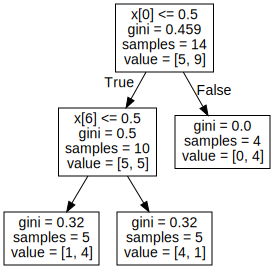

In [50]:
from sklearn import tree
from IPython.display import SVG
from graphviz import Source

# Export the decision tree as a DOT file
dot_data = tree.export_graphviz(classifier, out_file=None)

# Create a Graphviz graph from the DOT data
graph = Source(dot_data)

# Display the decision tree as SVG
SVG(graph.pipe(format='svg'))


```python
# Export the decision tree as a DOT file
dot_data = tree.export_graphviz(classifier, out_file=None)
```

In this line, the `export_graphviz` function from the `tree` module is used to export the decision tree classifier (`classifier`) as DOT data. The `out_file=None` parameter ensures that the DOT data is returned as a string (`dot_data`) instead of being saved to a file.

```python
# Create a Graphviz graph from the DOT data
graph = Source(dot_data)
```

The `Source` function from the `graphviz` module is used to create a Graphviz graph object (`graph`) from the DOT data (`dot_data`). This graph object represents the decision tree structure.

```python
# Display the decision tree as SVG
SVG(graph.pipe(format='svg'))
```

The `pipe` method of the `graph` object is used to convert the graph into SVG format. The `format='svg'` parameter specifies that the output format should be SVG (Scalable Vector Graphics). Finally, the `SVG` function from the `IPython.display` module is used to display the SVG output.

# Task 2 - Heart Dataset

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [58]:
data = pd.read_csv("heart.csv")
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [71]:
X = data.drop(['TenYearCHD'], axis=1)
y = data['TenYearCHD']

In [72]:
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the dataset
X_imputed = imputer.fit_transform(X)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
X_train

array([[  0.  ,  46.  ,   3.  , ...,  19.7 , 100.  ,  70.  ],
       [  1.  ,  43.  ,   2.  , ...,  26.64,  72.  ,  58.  ],
       [  0.  ,  48.  ,   3.  , ...,  21.08,  75.  ,  65.  ],
       ...,
       [  1.  ,  47.  ,   4.  , ...,  28.23,  48.  ,  76.  ],
       [  1.  ,  53.  ,   2.  , ...,  27.75,  67.  , 104.  ],
       [  1.  ,  50.  ,   2.  , ...,  30.89,  60.  ,  69.  ]])

In [74]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.73224043715847

* i.

In [75]:
classifier = DecisionTreeClassifier(criterion="entropy")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7636612021857924

* ii.

In [77]:
classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8333333333333334

* iii.

In [76]:
classifier = DecisionTreeClassifier(min_samples_leaf=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.75

*min_samples_leaf parameter specifies the minimum number of samples required to be at a leaf node*